# In the name of ALLAH


In [1]:
# import library 

import pandas as pd
import numpy as np
import shap
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/home/soophist/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import dataset

df = pd.read_csv("primary_dataset.csv")
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [3]:
# drop feature that we dont need it

features_drop = ['Country', 'Year', 'Region', 'Life_expectancy', 'Economy_status_Developing']
X = df.drop(columns=features_drop, axis=1)
X.dtypes

Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
dtype: object

In [4]:
y = df.Life_expectancy
y.head()

0    63.4
1    63.0
2    62.5
3    62.1
4    61.6
Name: Life_expectancy, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# train a machine learning model

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
# fits the explainer

explainer = shap.ExactExplainer(model.predict, X_test)
shap_values = explainer(X_test)

ExactExplainer explainer: 574it [3:53:52, 24.49s/it]                                       


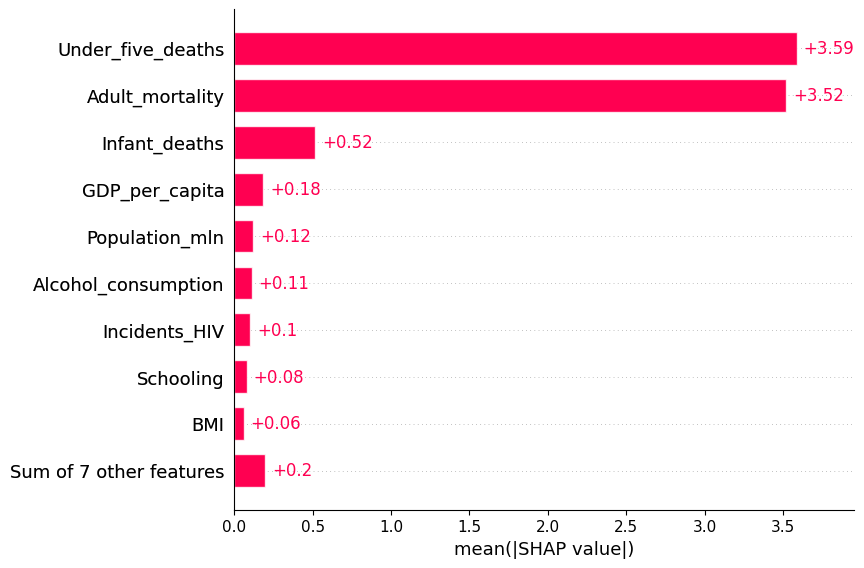

In [8]:
shap.plots.bar(shap_values)

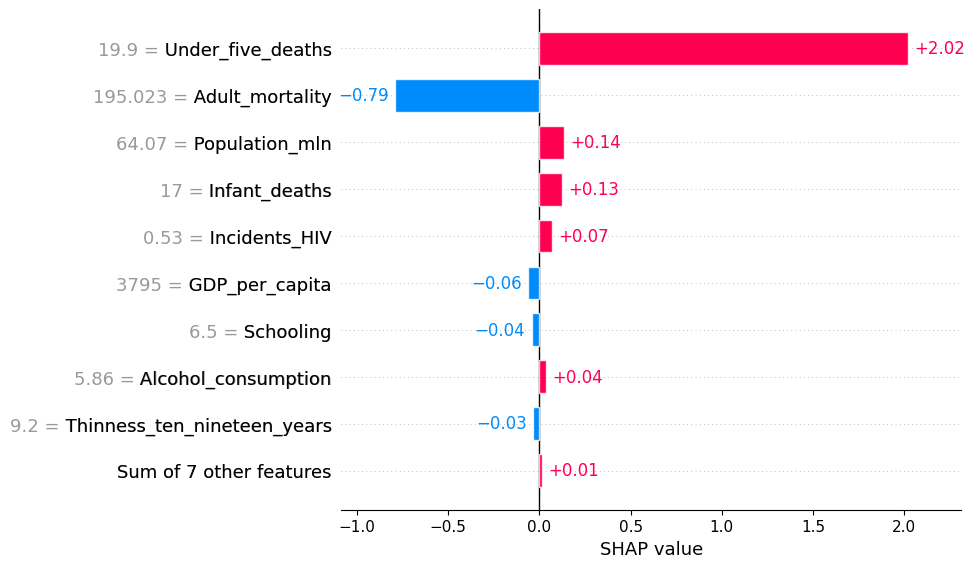

In [12]:
shap.plots.bar(shap_values[0])


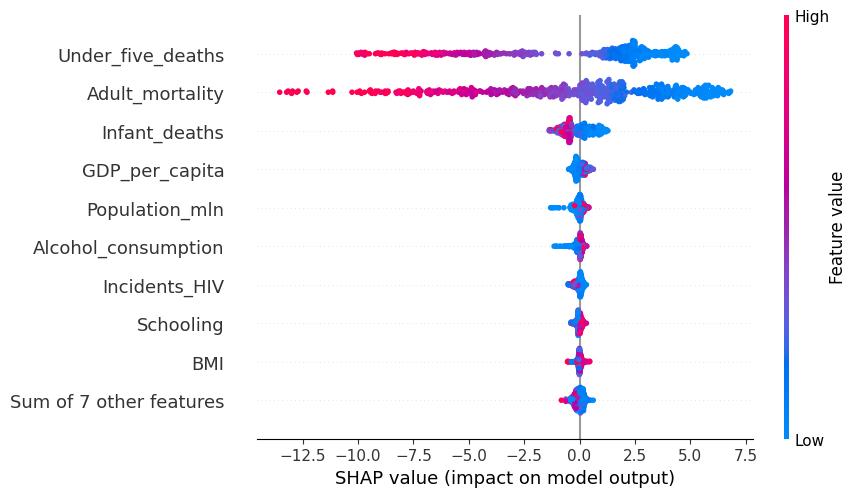

In [10]:
shap.plots.beeswarm(shap_values)


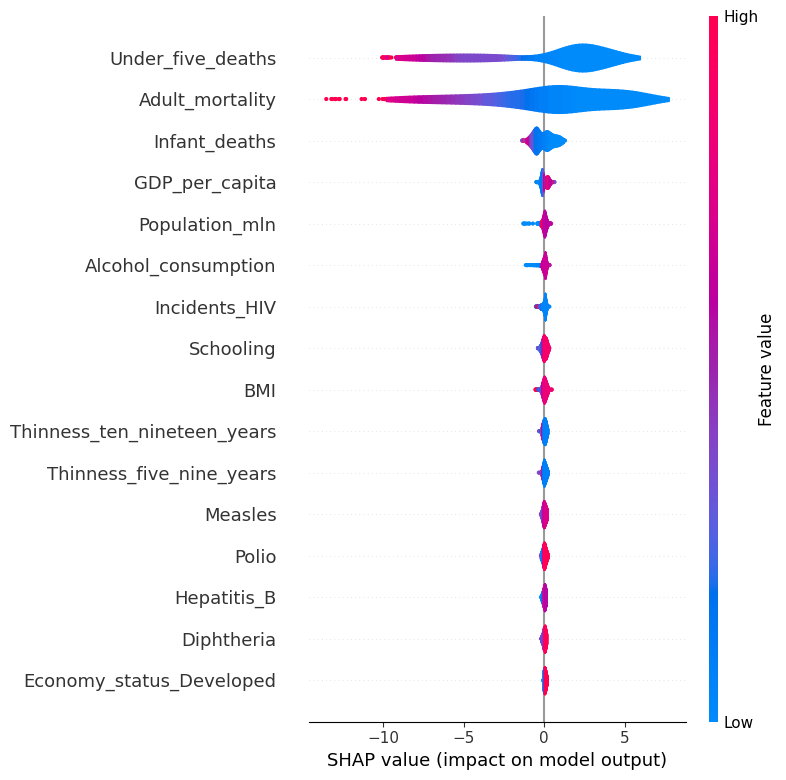

In [11]:
shap.summary_plot(shap_values, plot_type='violin')


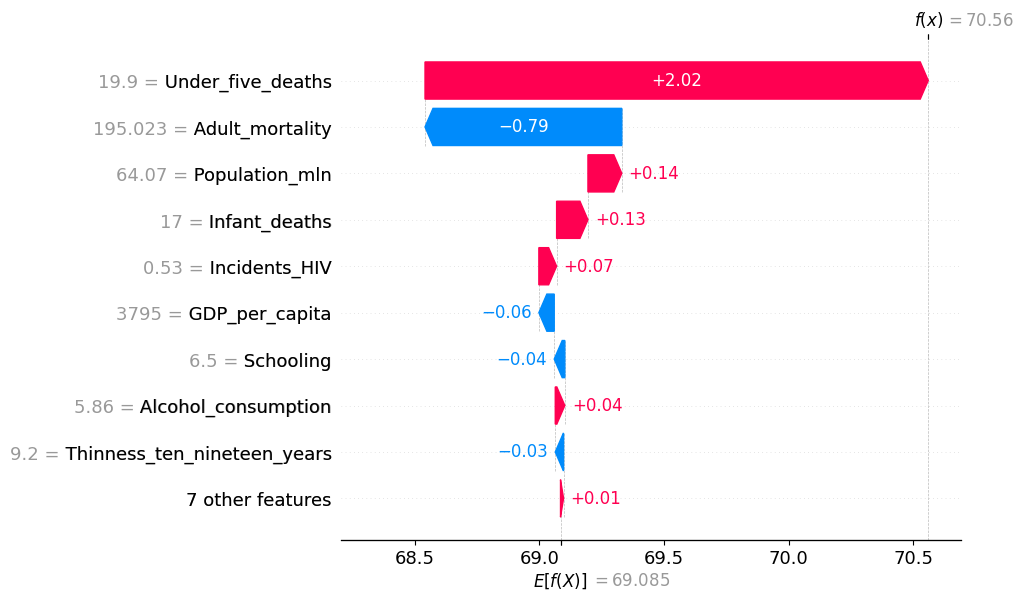

In [13]:
shap.plots.waterfall(shap_values[0])